In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

pd.set_option('display.max_columns', 30)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/EDA/heart_failure_clinical_records_dataset.csv')

In [12]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [93]:
df.shape

(299, 13)

In [14]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [16]:
df.age.unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

In [17]:
df.platelets.unique()

array([265000.  , 263358.03, 162000.  , 210000.  , 327000.  , 204000.  ,
       127000.  , 454000.  , 388000.  , 368000.  , 253000.  , 136000.  ,
       276000.  , 427000.  ,  47000.  , 262000.  , 166000.  , 237000.  ,
        87000.  , 297000.  , 289000.  , 149000.  , 196000.  , 284000.  ,
       153000.  , 200000.  , 360000.  , 319000.  , 302000.  , 188000.  ,
       228000.  , 226000.  , 321000.  , 305000.  , 329000.  , 185000.  ,
       218000.  , 194000.  , 310000.  , 271000.  , 451000.  , 140000.  ,
       395000.  , 418000.  , 351000.  , 255000.  , 461000.  , 223000.  ,
       216000.  , 254000.  , 390000.  , 385000.  , 119000.  , 213000.  ,
       274000.  , 244000.  , 497000.  , 374000.  , 122000.  , 243000.  ,
       266000.  , 317000.  , 283000.  , 324000.  , 293000.  , 172000.  ,
       406000.  , 173000.  , 304000.  , 235000.  , 181000.  , 249000.  ,
       219000.  , 318000.  , 221000.  , 298000.  , 286000.  , 621000.  ,
       263000.  , 850000.  , 306000.  , 252000.  , 

In [24]:
df["platelets"] = df["platelets"].astype(int, errors = 'ignore')

In [25]:
df.platelets.dtype

dtype('int64')

In [26]:
df.platelets.unique()

array([265000, 263358, 162000, 210000, 327000, 204000, 127000, 454000,
       388000, 368000, 253000, 136000, 276000, 427000,  47000, 262000,
       166000, 237000,  87000, 297000, 289000, 149000, 196000, 284000,
       153000, 200000, 360000, 319000, 302000, 188000, 228000, 226000,
       321000, 305000, 329000, 185000, 218000, 194000, 310000, 271000,
       451000, 140000, 395000, 418000, 351000, 255000, 461000, 223000,
       216000, 254000, 390000, 385000, 119000, 213000, 274000, 244000,
       497000, 374000, 122000, 243000, 266000, 317000, 283000, 324000,
       293000, 172000, 406000, 173000, 304000, 235000, 181000, 249000,
       219000, 318000, 221000, 298000, 286000, 621000, 263000, 850000,
       306000, 252000, 328000, 164000, 507000, 203000, 217000, 300000,
       267000, 227000, 250000, 295000, 231000, 211000, 348000, 229000,
       338000, 242000, 225000, 184000, 277000, 362000, 174000, 448000,
        75000, 334000, 192000, 220000,  70000, 270000, 325000, 176000,
      

In [27]:
df['serum_creatinine'].unique()

array([1.9 , 1.1 , 1.3 , 2.7 , 2.1 , 1.2 , 1.5 , 9.4 , 4.  , 0.9 , 1.  ,
       0.8 , 1.6 , 1.83, 5.8 , 3.  , 3.5 , 2.3 , 0.6 , 4.4 , 1.4 , 6.8 ,
       2.2 , 2.  , 1.18, 2.9 , 0.7 , 1.7 , 2.5 , 1.8 , 3.2 , 0.75, 3.7 ,
       3.4 , 6.1 , 2.4 , 9.  , 5.  , 0.5 , 3.8 ])

In [28]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

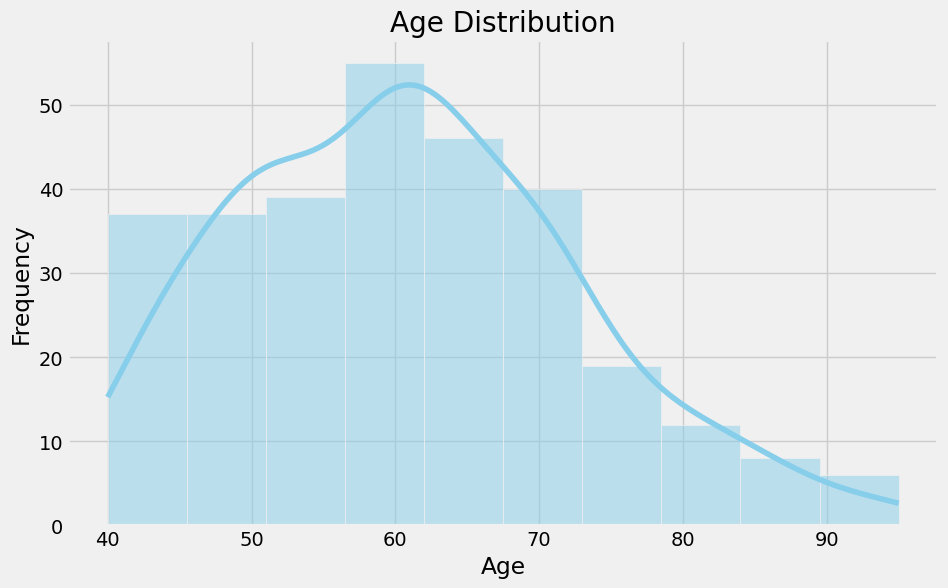

In [29]:
plt.figure(figsize= (10, 6))
sns.histplot(df['age'], kde = True, color = 'skyblue')
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

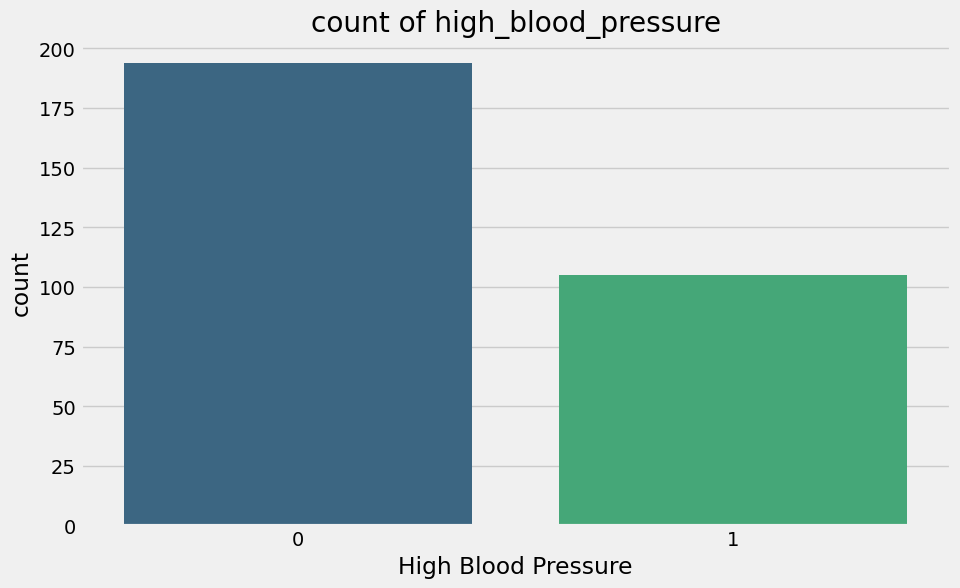

In [41]:
df['high_blood_pressure']= df['high_blood_pressure'].replace({'False': 0,'True':1}, inplace=False)
#How people have high bllod pressure
plt.figure(figsize = (10, 6))
sns.countplot(x = 'high_blood_pressure', data =df, palette = 'viridis')
plt.title('count of high_blood_pressure')
plt.xlabel('High Blood Pressure')
plt.ylabel('count')
plt.show()

In [45]:
df['DEATH_EVENT'].unique()

array([1, 0])

In [42]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

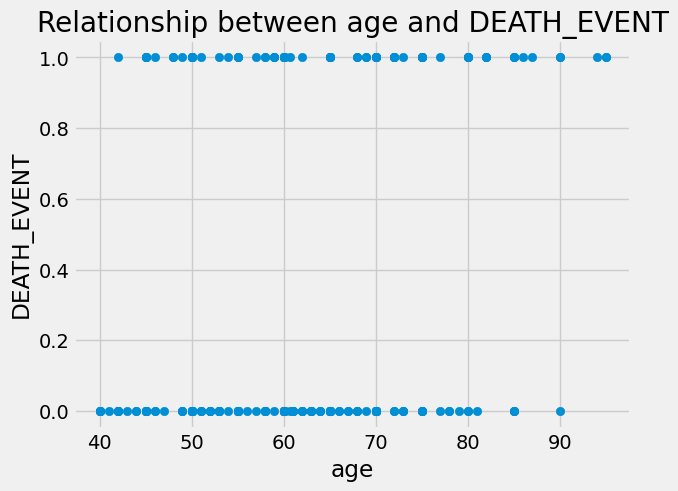

In [43]:
plt.scatter(df['age'], df['DEATH_EVENT'])
plt.xlabel('age')
plt.ylabel('DEATH_EVENT')
plt.title('Relationship between age and DEATH_EVENT')
plt.show()

In [46]:
df['DEATH_EVENT'] = df['DEATH_EVENT'].replace({0: True, 1: False})

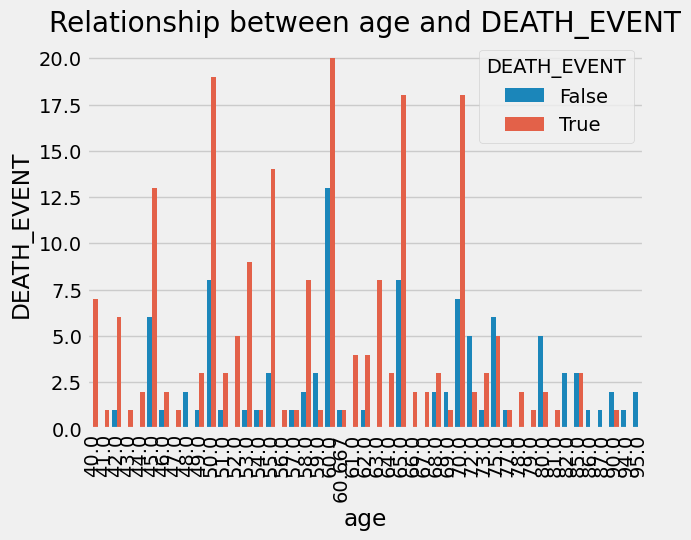

In [48]:
sns.countplot(x='age', hue='DEATH_EVENT', data=df)
plt.xlabel('age')
plt.xticks(rotation=90)
plt.ylabel('DEATH_EVENT')
plt.title('Relationship between age and DEATH_EVENT')
plt.show()

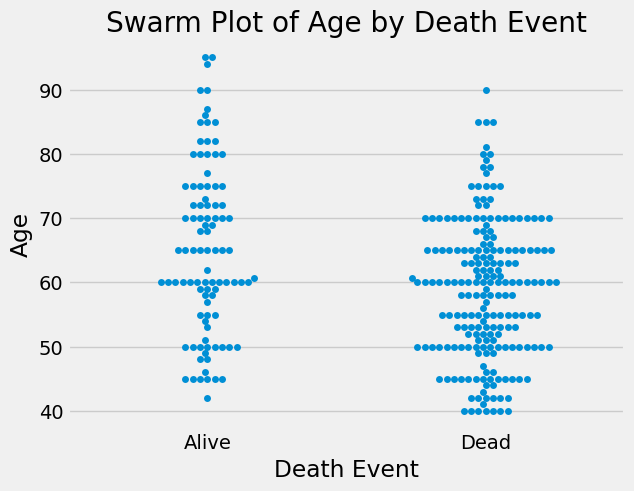

In [49]:
#Swarm plot
sns.swarmplot(x='DEATH_EVENT', y='age', data=df)
plt.xlabel('Death Event')
plt.ylabel('Age')
plt.title('Swarm Plot of Age by Death Event')
plt.xticks([0, 1], ['Alive', 'Dead'])
plt.show()


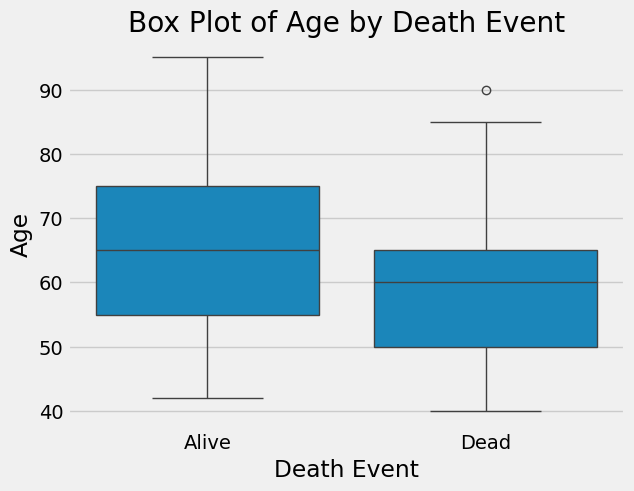

In [50]:
#Box plot
sns.boxplot(x='DEATH_EVENT', y='age', data=df)
plt.xlabel('Death Event')
plt.ylabel('Age')
plt.title('Box Plot of Age by Death Event')
plt.xticks([0, 1], ['Alive', 'Dead'])
plt.show()


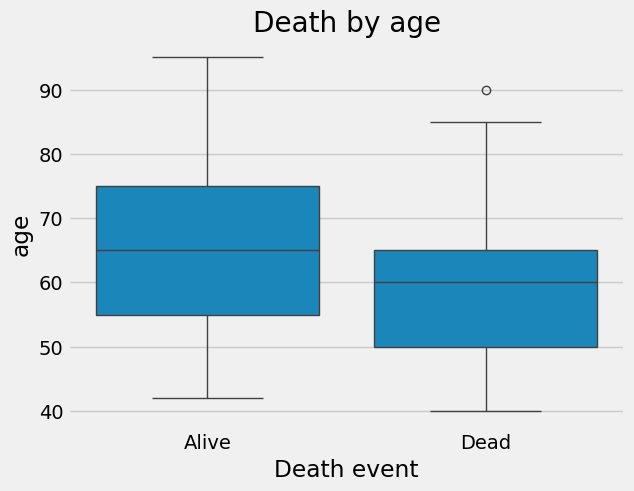

In [51]:
# sns.boxplot(x ='DEATH_EVENT', y ='age', data = df)
# plt.title('Death by age')
# plt.xlabel('Death event')
# plt.ylabel('age')
# plt.xticks([0, 1], ['Alive', 'Dead'])
# plt.show()

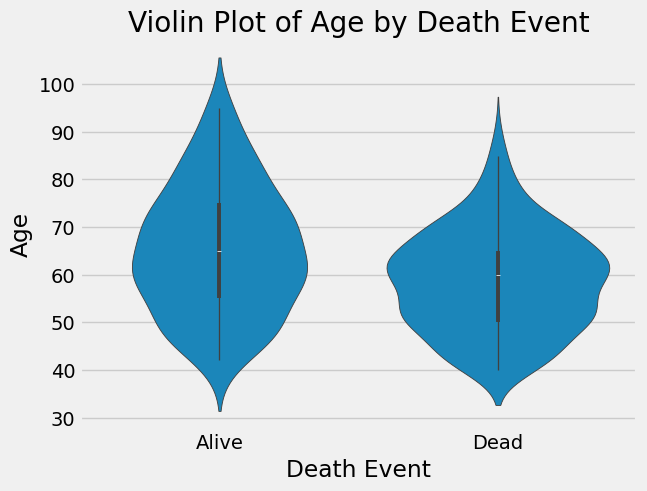

In [53]:
sns.violinplot(x='DEATH_EVENT', y='age', data=df)
plt.xlabel('Death Event')
plt.ylabel('Age')
plt.title('Violin Plot of Age by Death Event')
plt.xticks([0, 1], ['Alive', 'Dead'])
plt.show()


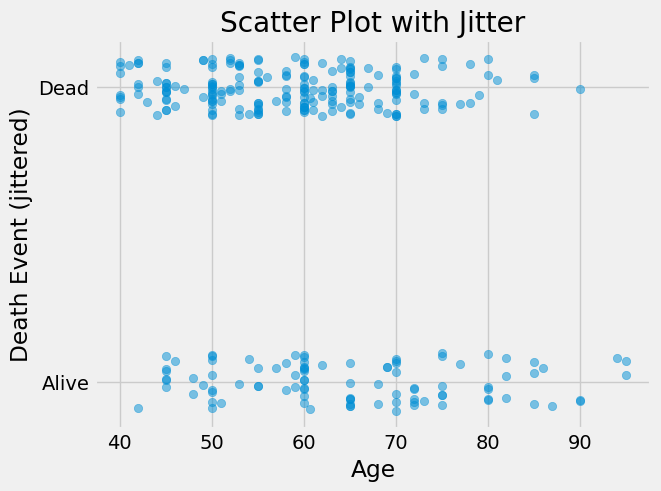

In [55]:
# Adding jitter
jitter = np.random.uniform(-0.1, 0.1, size=len(df))
plt.scatter(df['age'], df['DEATH_EVENT'] + jitter, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Death Event (jittered)')
plt.title('Scatter Plot with Jitter')
plt.yticks([0, 1], ['Alive', 'Dead'])
plt.show()

In [ ]:
# What is the percentage of male and female patients in the dataset?

In [56]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [62]:
df['sex'].value_counts(normalize =True)

sex
1    0.648829
0    0.351171
Name: proportion, dtype: float64

In [63]:
df.sex.unique()

array([1, 0])

In [64]:
female_percentage = (df['sex'][df['sex'] == 0].count() / len(df) *100)
male_percentage = (df['sex'][df['sex'] == 1].count() / len(df) *100)

In [66]:
female_percentage

35.11705685618729

In [67]:
male_percentage

64.88294314381271

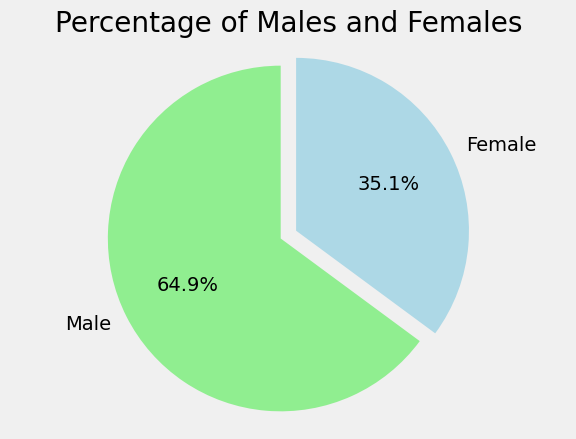

In [71]:
# Create a pie chart for male and female percentages
labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['lightgreen','lightblue'],explode =(0, 0.1), startangle=90)
plt.axis('equal')
plt.title('Percentage of Males and Females')
plt.show()

In [ ]:
#How does the platlet count vary among different age group

In [72]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [73]:
df['platelets'].unique()

array([265000, 263358, 162000, 210000, 327000, 204000, 127000, 454000,
       388000, 368000, 253000, 136000, 276000, 427000,  47000, 262000,
       166000, 237000,  87000, 297000, 289000, 149000, 196000, 284000,
       153000, 200000, 360000, 319000, 302000, 188000, 228000, 226000,
       321000, 305000, 329000, 185000, 218000, 194000, 310000, 271000,
       451000, 140000, 395000, 418000, 351000, 255000, 461000, 223000,
       216000, 254000, 390000, 385000, 119000, 213000, 274000, 244000,
       497000, 374000, 122000, 243000, 266000, 317000, 283000, 324000,
       293000, 172000, 406000, 173000, 304000, 235000, 181000, 249000,
       219000, 318000, 221000, 298000, 286000, 621000, 263000, 850000,
       306000, 252000, 328000, 164000, 507000, 203000, 217000, 300000,
       267000, 227000, 250000, 295000, 231000, 211000, 348000, 229000,
       338000, 242000, 225000, 184000, 277000, 362000, 174000, 448000,
        75000, 334000, 192000, 220000,  70000, 270000, 325000, 176000,
      

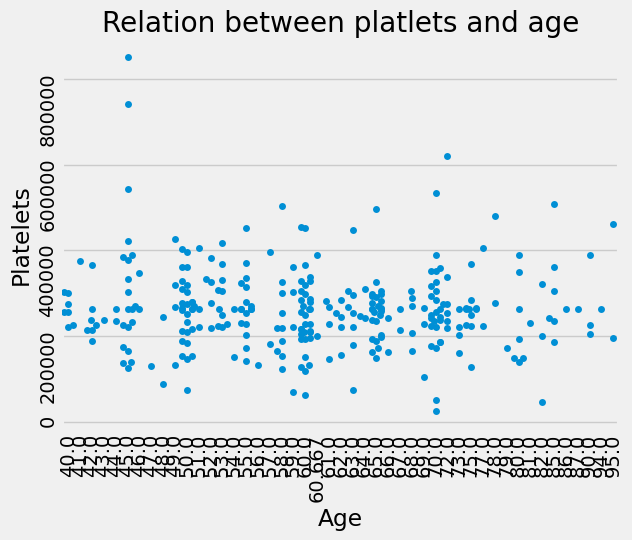

In [74]:
# Not viable
sns.swarmplot(x ='age', y ='platelets', data = df)
plt.title('Relation between platlets and age')
plt.xlabel('Age')
plt.ylabel('Platelets')
plt.xticks(rotation = 90)
plt.yticks(rotation =90)
plt.show()

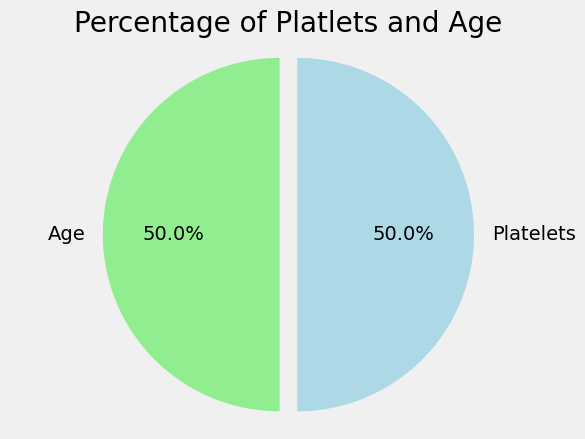

In [78]:
#Not viable
#Pie chart
labels =['Age', 'Platelets']
sizes = [df['age'].count(), df['platelets'].count()]
plt.pie(sizes, labels =labels, autopct='%1.1f%%',colors=['lightgreen','lightblue'],explode =(0, 0.1), startangle=90)
plt.axis('equal')
plt.title('Percentage of Platlets and Age')
plt.show()

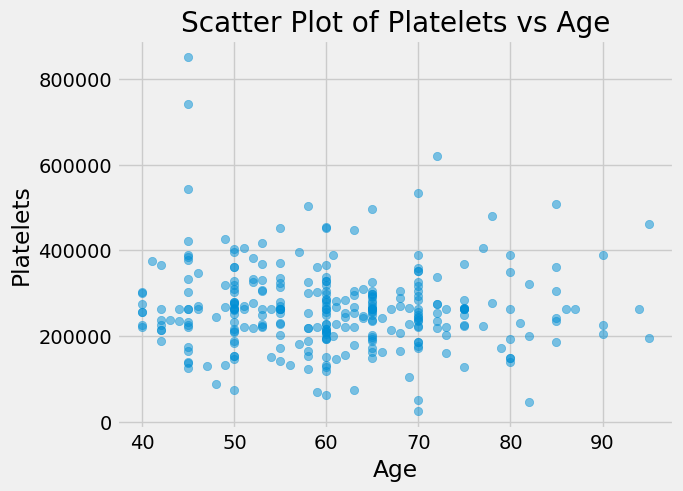

In [80]:
plt.scatter(df['age'], df['platelets'], alpha=0.5,)
plt.xlabel('Age')
plt.ylabel('Platelets')
plt.title('Scatter Plot of Platelets vs Age')
plt.show()

In [82]:
df.columns


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<Axes: >

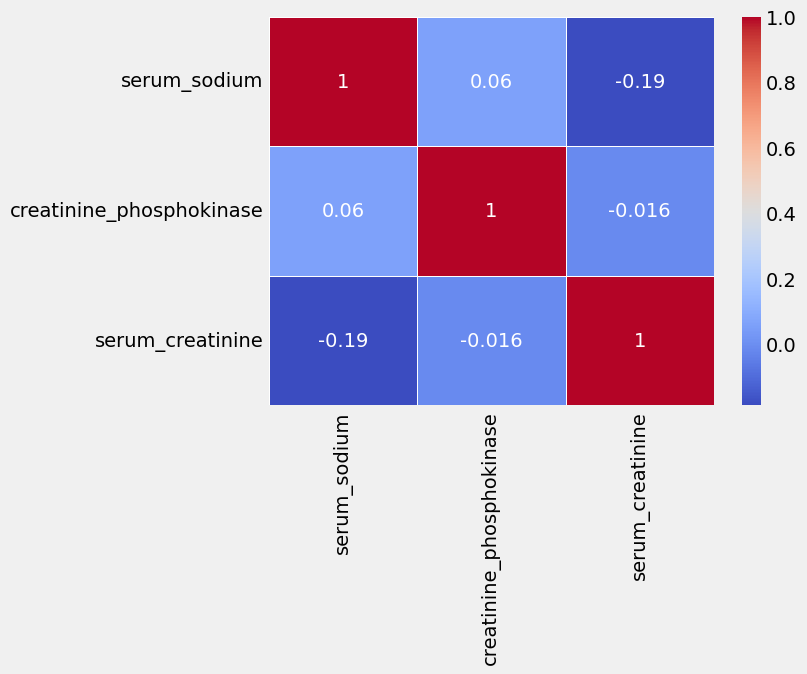

In [90]:
selected_columns= ['serum_sodium', 'creatinine_phosphokinase', 'serum_creatinine']
sns.heatmap(df[selected_columns].corr(), annot = True, cmap = "coolwarm", linewidth = .5)

In [95]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
#How does the prevalence of high blood pressure differ between male and female patients

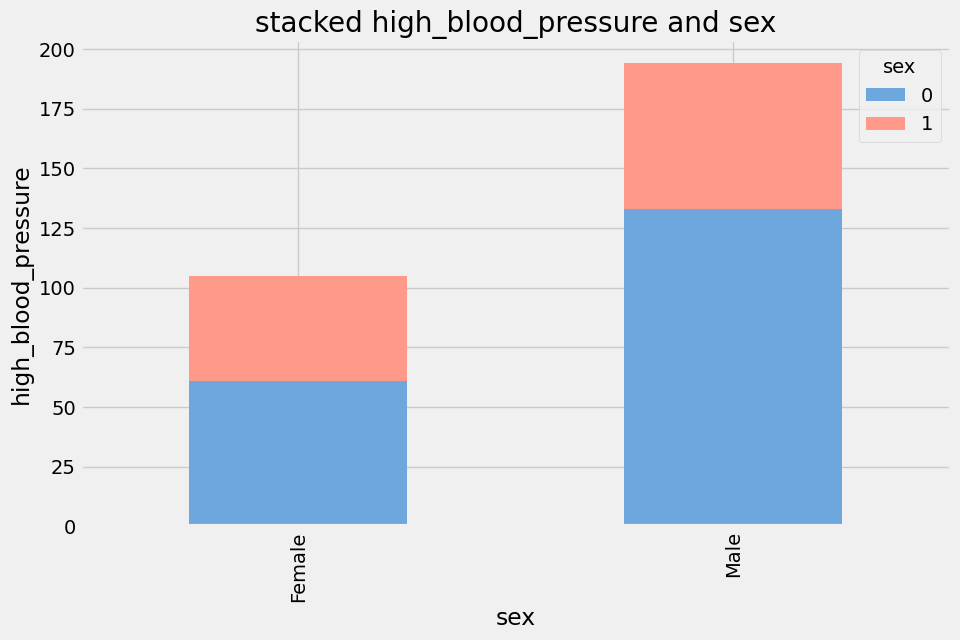

In [99]:
bloddpressure_sex = pd.crosstab(df['sex'], df['high_blood_pressure'])
bloddpressure_sex.plot(kind = 'bar', stacked = True, color = ['#6DA7DE', '#FF9A8B'], figsize = (10, 6))

plt.xlabel("sex")
plt.ylabel("high_blood_pressure")
plt.legend(title="sex")
plt.xticks([0, 1], ['Female', 'Male'])
plt.title("stacked high_blood_pressure and sex")
plt.show()

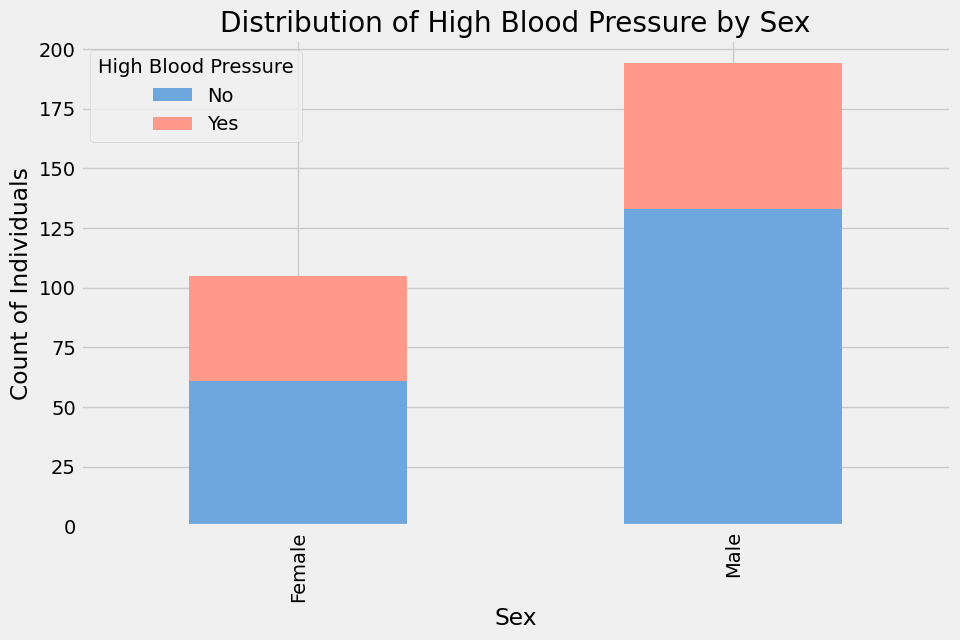

In [110]:
bloddpressure_sex = pd.crosstab(df['sex'], df['high_blood_pressure'])
bloddpressure_sex.plot(kind = 'bar', stacked = True, color = ['#6DA7DE', '#FF9A8B'], figsize = (10, 6))

plt.xlabel("Sex") # Change to singular form
plt.ylabel("Count of Individuals") # More descriptive label
plt.legend(title="High Blood Pressure", labels=['No', 'Yes'])
plt.xticks([0, 1], ['Female', 'Male'])
plt.title("Distribution of High Blood Pressure by Sex") # More informative title
plt.show()

In [ ]:
#What is the realtion between smoking habits and high blood pressure

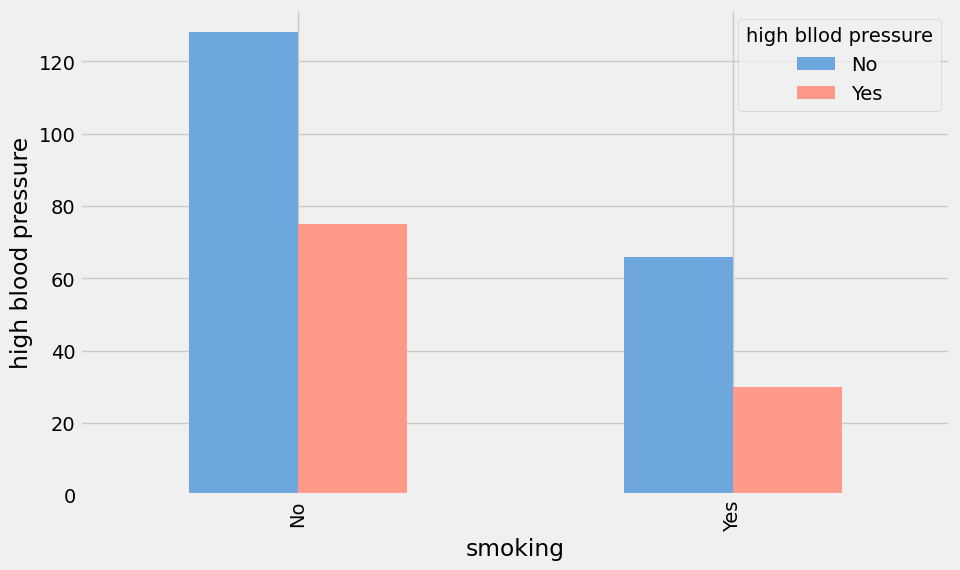

In [116]:
is_smoking = pd.crosstab(df['smoking'], df['high_blood_pressure'])
is_smoking.plot(kind = 'bar', color = ['#6DA7DE', '#FF9A8B'], figsize = (10, 6))
plt.xlabel("smoking")
plt.ylabel("high blood pressure")
plt.legend(title="high bllod pressure", labels=['No', 'Yes'])
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [115]:
df.smoking.values


array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

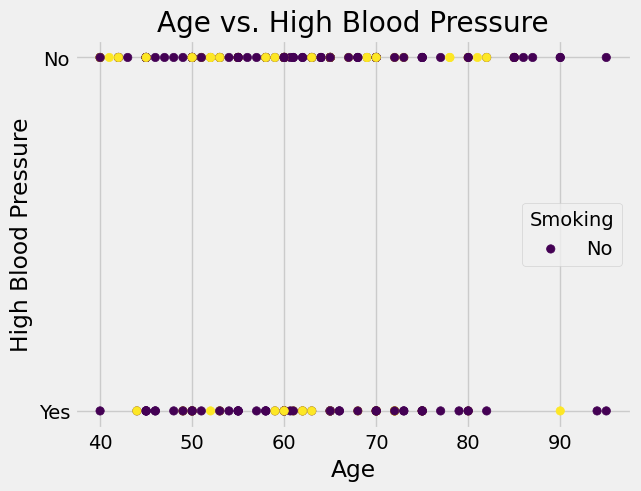

In [119]:
df['high_blood_pressure'] = df['high_blood_pressure'].replace({0: 'No', 1: 'Yes'})
plt.scatter(df['age'], df['high_blood_pressure'], c=df['smoking'])

plt.xlabel("Age")
plt.ylabel("High Blood Pressure")
plt.title("Age vs. High Blood Pressure")

plt.legend(['No', 'Yes'], title='Smoking')

plt.show()

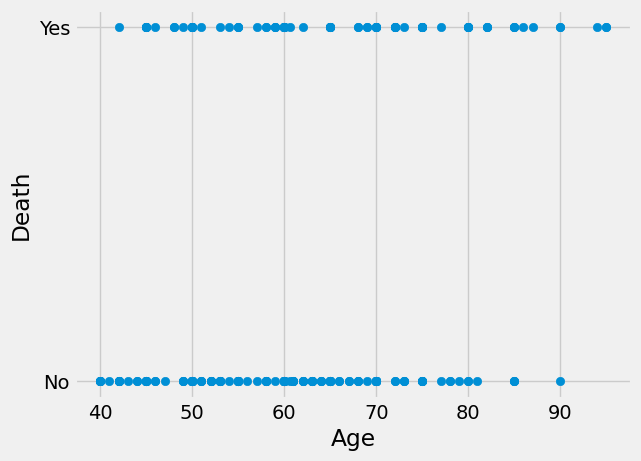

In [141]:
plt.scatter(df['age'], df['DEATH_EVENT'])
plt.xlabel('Age')
plt.ylabel('Death')
plt.yticks([0,1],['No', 'Yes'])
# plt.legend(['Yes', 'No'], title ='Dead')
plt.show()

In [131]:
df.DEATH_EVENT.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [3]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
df.diabetes.values

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0])

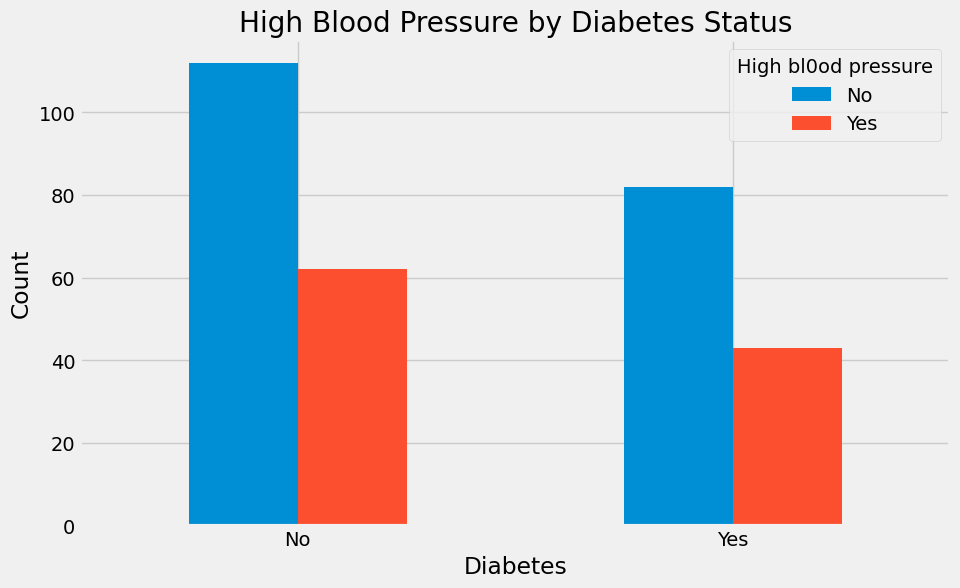

In [9]:
grouped_df = df.groupby(['diabetes', 'high_blood_pressure']).size().unstack()
grouped_df.plot(kind='bar', figsize=(10, 6))

plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.title("High Blood Pressure by Diabetes Status")
plt.legend(['No', 'Yes'], title ='High bl0od pressure')
plt.xticks([0,1],['No','Yes'],rotation=0)

plt.show()

In [10]:
df.serum_creatinine.values

array([1.9 , 1.1 , 1.3 , 1.9 , 2.7 , 2.1 , 1.2 , 1.1 , 1.5 , 9.4 , 4.  ,
       0.9 , 1.1 , 1.1 , 1.  , 1.3 , 0.9 , 0.8 , 1.  , 1.9 , 1.3 , 1.6 ,
       0.9 , 0.8 , 1.83, 1.9 , 1.  , 1.3 , 5.8 , 1.2 , 1.83, 3.  , 1.  ,
       1.2 , 1.  , 3.5 , 1.  , 1.  , 2.3 , 3.  , 1.83, 1.2 , 1.2 , 1.  ,
       1.1 , 1.9 , 0.9 , 0.6 , 4.4 , 1.  , 1.  , 1.4 , 6.8 , 1.  , 2.2 ,
       2.  , 2.7 , 0.6 , 1.1 , 1.3 , 1.  , 2.3 , 1.1 , 1.  , 1.18, 2.9 ,
       1.3 , 1.  , 1.2 , 1.83, 0.8 , 0.9 , 1.  , 1.3 , 1.2 , 0.7 , 0.8 ,
       1.2 , 0.6 , 0.9 , 1.7 , 1.18, 2.5 , 1.8 , 1.  , 0.7 , 1.1 , 0.8 ,
       0.7 , 1.1 , 0.8 , 1.  , 1.18, 1.7 , 0.7 , 1.  , 1.3 , 1.1 , 1.2 ,
       1.1 , 1.1 , 1.18, 1.1 , 1.  , 2.3 , 1.7 , 1.3 , 0.9 , 1.1 , 1.3 ,
       1.2 , 1.2 , 1.6 , 1.3 , 1.2 , 1.  , 0.7 , 3.2 , 0.9 , 1.83, 1.5 ,
       1.  , 0.75, 0.9 , 3.7 , 1.3 , 2.1 , 0.8 , 0.7 , 3.4 , 0.7 , 6.1 ,
       1.18, 1.3 , 1.18, 1.18, 0.9 , 2.1 , 1.  , 0.8 , 1.1 , 0.9 , 0.9 ,
       0.9 , 1.7 , 0.7 , 0.7 , 1.  , 1.83, 0.9 , 2.

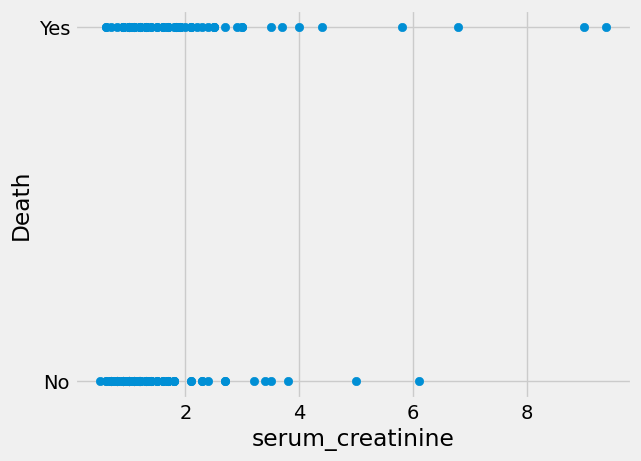

In [11]:
plt.scatter(df['serum_creatinine'], df['DEATH_EVENT'])
plt.xlabel('serum_creatinine')
plt.ylabel('Death')
plt.yticks([0,1],['No', 'Yes'])
# plt.legend(['Yes', 'No'], title ='Dead')
plt.show()

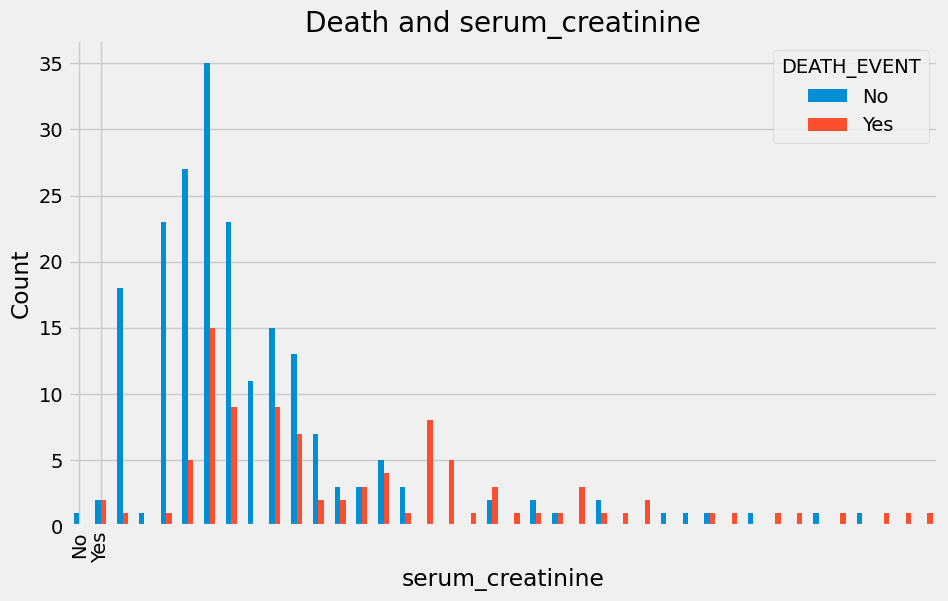

In [13]:
grouped_df = df.groupby(['serum_creatinine', 'DEATH_EVENT']).size().unstack()
grouped_df.plot(kind='bar', figsize=(10, 6))

plt.xlabel("serum_creatinine")
plt.ylabel("Count")
plt.title("Death and serum_creatinine")
plt.legend(['No', 'Yes'], title ='DEATH_EVENT')
plt.xticks([0,1],['No','Yes'],rotation=90)

plt.show()

In [14]:
df.serum_creatinine.values

array([1.9 , 1.1 , 1.3 , 1.9 , 2.7 , 2.1 , 1.2 , 1.1 , 1.5 , 9.4 , 4.  ,
       0.9 , 1.1 , 1.1 , 1.  , 1.3 , 0.9 , 0.8 , 1.  , 1.9 , 1.3 , 1.6 ,
       0.9 , 0.8 , 1.83, 1.9 , 1.  , 1.3 , 5.8 , 1.2 , 1.83, 3.  , 1.  ,
       1.2 , 1.  , 3.5 , 1.  , 1.  , 2.3 , 3.  , 1.83, 1.2 , 1.2 , 1.  ,
       1.1 , 1.9 , 0.9 , 0.6 , 4.4 , 1.  , 1.  , 1.4 , 6.8 , 1.  , 2.2 ,
       2.  , 2.7 , 0.6 , 1.1 , 1.3 , 1.  , 2.3 , 1.1 , 1.  , 1.18, 2.9 ,
       1.3 , 1.  , 1.2 , 1.83, 0.8 , 0.9 , 1.  , 1.3 , 1.2 , 0.7 , 0.8 ,
       1.2 , 0.6 , 0.9 , 1.7 , 1.18, 2.5 , 1.8 , 1.  , 0.7 , 1.1 , 0.8 ,
       0.7 , 1.1 , 0.8 , 1.  , 1.18, 1.7 , 0.7 , 1.  , 1.3 , 1.1 , 1.2 ,
       1.1 , 1.1 , 1.18, 1.1 , 1.  , 2.3 , 1.7 , 1.3 , 0.9 , 1.1 , 1.3 ,
       1.2 , 1.2 , 1.6 , 1.3 , 1.2 , 1.  , 0.7 , 3.2 , 0.9 , 1.83, 1.5 ,
       1.  , 0.75, 0.9 , 3.7 , 1.3 , 2.1 , 0.8 , 0.7 , 3.4 , 0.7 , 6.1 ,
       1.18, 1.3 , 1.18, 1.18, 0.9 , 2.1 , 1.  , 0.8 , 1.1 , 0.9 , 0.9 ,
       0.9 , 1.7 , 0.7 , 0.7 , 1.  , 1.83, 0.9 , 2.

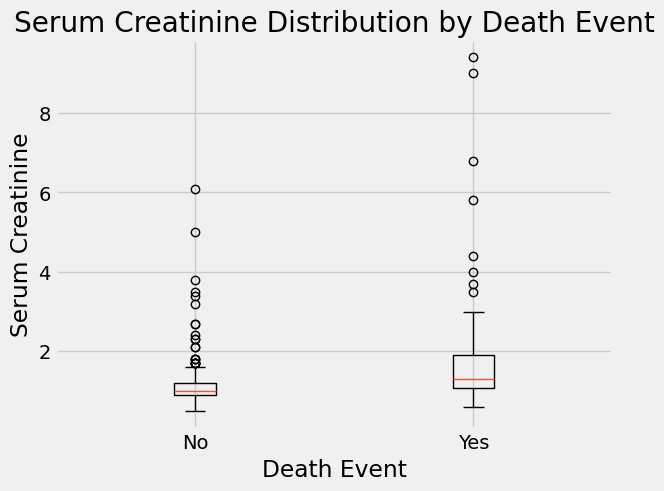

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame

plt.boxplot([df[df['DEATH_EVENT'] == 0]['serum_creatinine'],
             df[df['DEATH_EVENT'] == 1]['serum_creatinine']],
            labels=['No', 'Yes'])

plt.xlabel('Death Event')
plt.ylabel('Serum Creatinine')
plt.title('Serum Creatinine Distribution by Death Event')

plt.show()